In [42]:
%%script true
#CodeP2.5F24  ME249   V.P. Carey
#===import relevant packages
import tensorflow
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
#the following 2 lines are only needed for Mac OS machines 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#========================

#create input data array
# meadian values of input variables
Tmed = 293.
gamed = 0.25
qsmed = 1250.
#T1(K), gamma, , qsol(kW):
xdata = []
ND = 60
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])


data_inputs = numpy.array(xdata)
print (data_inputs)

# meadian values of output variables
almed = 60.
efmed = 0.4
# alpha, effsys
ydata = []

ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])

data_outputs = numpy.array(ydata)
print (data_outputs)

In [43]:
'''>>>>> start CodeP2.3F24
    V.P. Carey ME249, Fall 2024

Intro to Neural Network Modeling 
Data arrays for hybrid solar/fossil-fuel gas turbine power system'''

#CodeP2.5F24  ME249   V.P. Carey
#===import relevant packages
import tensorflow
import tensorflow.keras
import pygad.kerasga
import numpy as np
import pygad
#the following 2 lines are only needed for Mac OS machines 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#========================

import statistics
from pprint import pprint

#create input data array, normalizing input temp
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2501.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])

ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

# gather statistics of the data
# xdata order = T1(K), gamma, , qsol(kW):

t1 = []
gamma = []
qsol = []

for a, b, c, in xdata:
    t1.append(a)
    gamma.append(b)
    qsol.append(c)

air_ratio = []
eff = []

for ar, e in ydata:
    air_ratio.append(ar)
    eff.append(e)

t1_med = statistics.median(t1)
gamma_med = statistics.median(gamma)
qsol_med = statistics.median(qsol)

ar_med = statistics.median(air_ratio)
eff_med = statistics.median(eff)

# normalize data
normalized_input_data = []
normalized_output_data = []

for dp in xdata:
    t1, gamma, qsol = dp
    normalized_input_data.append([t1/t1_med, gamma/gamma_med, qsol/qsol_med])

for ar, e in ydata:
    normalized_output_data.append([ar/ar_med, e/eff_med])

original_input = xdata
original_output = ydata

xdata = normalized_input_data
ydata = normalized_output_data

# export data to be used by the rest of the program
xarray= np.array(xdata)
yarray= np.array(ydata)

data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

# reassign variables (medians)
Tmed = t1_med
gamed = gamma_med
qsmed = qsol_med

almed = ar_med
efmed = eff_med

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 16        
                                                                 
 dense_35 (Dense)            (None, 5)                 25        
                                                                 
 dense_36 (Dense)            (None, 4)                 24        
                                                                 
 dense_37 (Dense)            (None, 3)                 15        
                                                                 
 dense_38 (Dense)            (None, 2)                 8         
                                                                 
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Fitness    = 0.04394304252645773
Generation = 2
Fitness    = 0.06831723738754807
Generation = 3
Fitness    = 0.11168896614603493
Generation = 4
Fitness    = 0.19985626980572752
Generation = 5
Fitness    = 0.6167345382016166
Generation = 6
Fitness    = 0.6663944993628306
Generation = 7
Fitness    = 0.9088177670491023
Generation = 8
Fitness    = 1.1689125382137946
Generation = 9
Fitness    = 1.2991158337738926
Generation = 10
Fitness    = 1.7445765348695181
Generation = 11
Fitness    = 2.194817347843957
Generation = 12
Fitness    = 2.366505874079046
Generation = 13
Fitness    = 3.0372264995536997
Generation = 14
Fitness    = 3.0372264995536997
Generation = 15
Fitness    = 4.877337758857162
Generation = 16
Fitness    = 5.8673900173516484
Generation = 17
Fitness    = 5.8673900173516484
Generation = 18
Fitness    = 5.876485066360281
Generation = 19
Fitness    = 5.910608002669209
Generation = 20
Fitness    = 5.910608002669209
Generation = 21
Fitness    = 6.008377488287773
Gene

/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


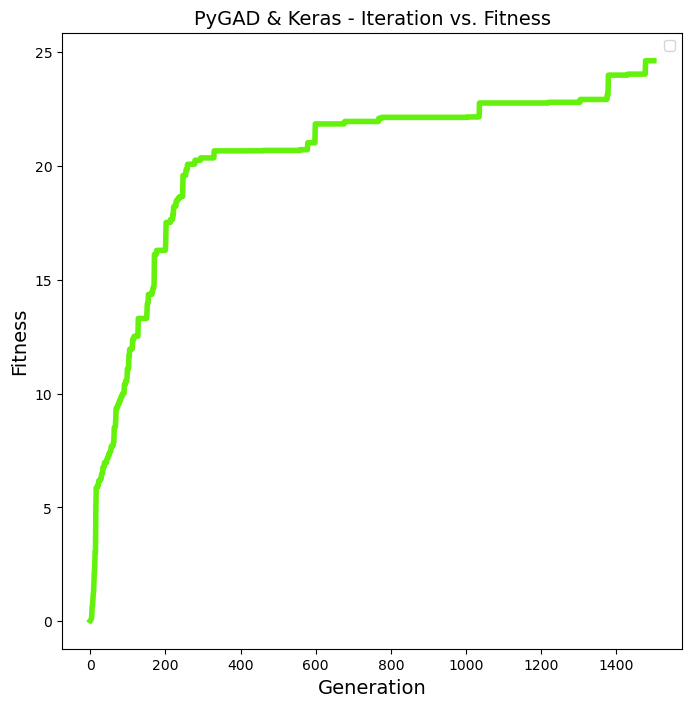

Fitness value of the best solution = 24.63096185280474
Index of the best solution : 0
2/2 [==============================] - 0s 5ms/step
Predictions : 
 [[0.554198   0.96404153]
 [0.67355025 0.9723667 ]
 [0.7929023  0.98069185]
 [0.91225445 0.989017  ]
 [1.0316063  0.9973421 ]
 [0.791691   0.98060733]
 [0.91104317 0.9889325 ]
 [1.0303952  0.99725765]
 [1.1497474  1.0055828 ]
 [1.3625934  1.0204295 ]
 [1.029184   0.9971732 ]
 [1.1485361  1.0054983 ]
 [1.3601006  1.0202556 ]
 [1.6057154  1.0373878 ]
 [2.1481426  0.97274   ]
 [0.5457425  0.9634517 ]
 [0.6552554  0.97109056]
 [0.77460736 0.9794157 ]
 [0.8939595  0.9877409 ]
 [1.0133116  0.99606603]
 [0.77339625 0.9793312 ]
 [0.89274836 0.98765635]
 [1.0121006  0.9959816 ]
 [1.1314523  1.0043067 ]
 [1.3249445  1.0178033 ]
 [1.0108893  0.99589705]
 [1.1302412  1.0042222 ]
 [1.3224521  1.0176295 ]
 [1.5680668  1.0347618 ]
 [1.9188933  1.0015442 ]
 [0.5407584  0.96310407]
 [0.6369607  0.9698144 ]
 [0.75631267 0.9781396 ]
 [0.8756649  0.9864647

In [44]:

#===define fitness function used in Genetic Algorithm - added ga_instance input as needed for
#      In PyGAD 2.20.0, the fitness function must accept 3 parameters:
#      1) The instance of the 'pygad.GA' class.
#      2) A solution to calculate its fitness value.
#      3) The solution's index within the population.
    
def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    #data output array and predictions array are provided
    #-->error for each data point is calcuated and mean abs error is computed for them
    #thus a mean fitness is determined for each solution using all data points
    meanabs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0/meanabs_error

    return solution_fitness

#========================END

#===define callback that keeps track of best solution for each generation and saves the best of
#      of all of them over the generations analyzed
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=np.max(ga_instance.last_generation_fitness)))
    
#========================END


#===defining a sequential Neural Network

#initialize weights with values between minval and maxval;
initializer = tensorflow.keras.initializers.RandomUniform(minval= -2.9, maxval=2.9)

model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(4, activation='relu', input_shape=[3], kernel_initializer=initializer), 
    tensorflow.keras.layers.Dense(8, activation='relu', kernel_initializer=initializer),
    tensorflow.keras.layers.Dense(4, activation='relu', kernel_initializer=initializer),
    tensorflow.keras.layers.Dense(2, kernel_initializer=initializer)
  ])
#Print summary of model features
model.summary()


#===define a vector that contains all the weights for Neural Network model
weights_vector = pygad.kerasga.model_weights_as_vector(model=model)


#===KerasGA Info below
'''KerasGA is part of the PyGAD library for training Keras models using the genetic algorithm (GA).
The KerasGA project has a single module named kerasga.py which has a class named KerasGA for 
preparing an initial population of Keras model parameters.

PyGAD is an open-source Python library for building the genetic algorithm 
and training machine learning algorithms. 
Check the library's documentation at Read The Docs: https://pygad.readthedocs.io'''

#===Appears to instantiate a keras genetic algorithm object in which the genes are the weights for 
#      NN model, and the population is 40 solutions - just used to set initial population
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=40)




#===set number of generations to run, and number of best fitness solutions to
#      keep and mate in each generation
num_generations = 1500       # takes forever... might lower the number
num_parents_mating = 7      #Number of solutions to be selected as parents.

'''sol_per_pop = number of best solutions kept??'''
sol_per_pop = 37  # if fitness_batch_size is supported to calculate the fitness function in batches, 
                  # then the solutions are grouped into batches of size
    
parent_selection_type = "sss"
'''Steady State Selection
In every generation few chromosomes are selected 
(good - with high fitness) for creating a new offspring. 
Then some (bad - with low fitness) chromosomes are removed 
and the new offspring is placed in their place. 
The rest of population survives to new generation.'''

keep_parents = 5
''' keep_parents=-1: Number of parents to keep in the current population. 
    -1 (default) means to keep all parents in the next population. 
    0 means keep no parents in the next population. A value greater than 0 
    means keeps the specified number of parents in the next population. '''

crossover_type = "single_point" 
''' crossover_type="single_point": Type of the crossover operation. Supported types are single_point 
    (for single-point crossover), two_points (for two points crossover), uniform (for uniform crossover), 
    and scattered (for scattered crossover). Scattered crossover is supported from PyGAD 2.9.0 and higher. 
    It defaults to single_point.'''

mutation_type = "random"
''' mutation_type="random": Type of the mutation operation. Supported types are random (for random mutation), 
    swap (for swap mutation), inversion (for inversion mutation), scramble (for scramble mutation), and 
    adaptive (for adaptive mutation). It defaults to random.'''

mutation_percent_genes = "default"
''' mutation_percent_genes="default": Percentage of genes to mutate. It defaults to the string "default" 
    which is later translated into the integer 10 which means 10% of the genes will be mutated. 
    It must be >0 and <=100. Out of this percentage, the number of genes to mutate is deduced 
    which is assigned to the mutation_num_genes parameter.'''

    
#===set initial population as the neural network weights
initial_population = keras_ga.population_weights


#===instantiate a pygad genetic algorithm object with desired attributes
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes,
                       on_generation=callback_generation)


#===run this instance of GA object that trains NN
ga_instance.run()

#===the following just plots and prints results after run for specified number of generations
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

print("data_outputs : \n", data_outputs)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)
#========================END

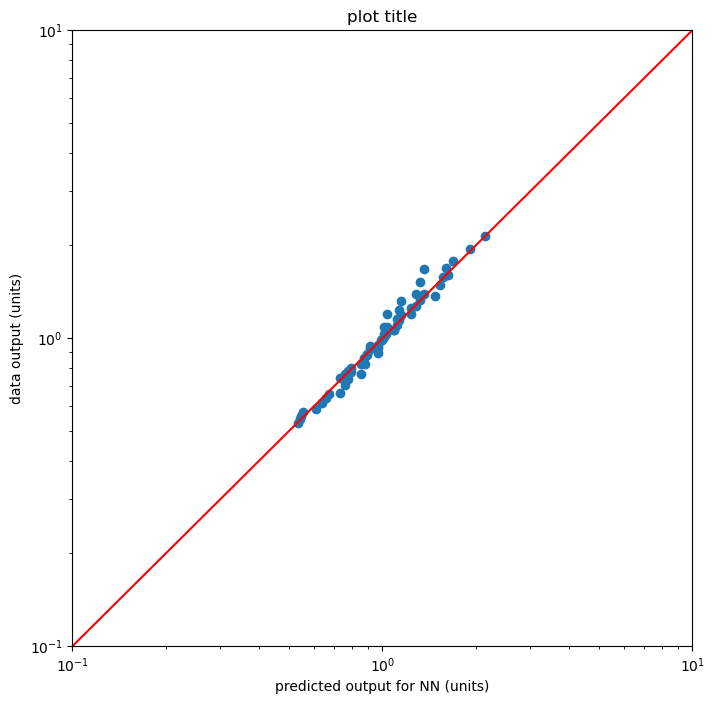

In [45]:
#SETTING UP PLOT
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt 
import numpy
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas 
#========

'''CALCULATE PREDICTED VALUES, RETRIEVE DATA VALUES AND PLOT'''

plt.scatter(predictions[:, 0], data_outputs[:, 0])
plt.title('plot title')
plt.xlabel('predicted output for NN (units)') 
plt.ylabel('data output (units)')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = numpy.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()


In [46]:
# Case Results Saver:
import pandas as pd

df = pd.DataFrame({
    'fitness': solution_fitness,
    'fitness idx': solution_idx,
    'mae': abs_error,
    'predictions': list(predictions),
    'data_outputs': list(data_outputs)
})

df.to_csv('case5.csv')